## Requirements

### Web-Scraping
#### 1. Take the base wg-gesucht URL and scrape the shared flats listed on the website
#### 2. most important data points are price, room size and number of flat mates

### Data Analyis
#### 1. Correlation analysis of room price and room size. Hypothesis: positive correlation
#### 2. Correlation analysis of room price and number of flat mates. Hypothesis: negative correlation

### Import all neccessary libraries

In [66]:
import requests
import random
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime

In [102]:
data = {'Bewohner': [], 'Eintrag': [], 'Miete': [], 'Groese': [] , 'Stadtteil': [], 'frei ab': [], 'frei bis': []}
df = pd.DataFrame(data=data)
print(df ,len(df))


Empty DataFrame
Columns: [Bewohner, Eintrag, Miete, Groese, Stadtteil, frei ab, frei bis]
Index: [] 0


In [27]:
proxies = [
    'http://24.106.221.230:53281',
    'http://118.70.12.171:53281',
    'http://198.199.86.11:8080',
    'http://107.173.80.140:9000',
    'http://159.203.61.169:8080',
    'http://134.209.29.120:3128',
    'http://192.140.42.83:31511',
    'http://20.187.77.5:80',
    'http://64.225.8.191:9986',
    'http://198.59.191.234:8080',
    'http://51.178.47.12:80',
    'http://82.180.163.163:80',
    'http://158.69.72.138:9300',
    'http://198.49.68.80:80',
    'http://51.15.192.229:8080',
    'http://161.35.70.249:8080',
    'http://143.110.232.177:80',
    'http://154.118.228.212:80',
    'http://177.87.144.122:5566',
    'http://200.25.254.193:54240',
    'http://82.180.163.163:80'
    ]
userAgents = [
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.1.1 Safari/605.1.15',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:77.0) Gecko/20100101 Firefox/77.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36',
]

In [31]:
def makeRequest(url):
    try:
        randomNum = random.randint(0, len(proxies) - 1)
        proxy = {proxies[randomNum][0 : 4] : proxies[randomNum]}
        print('Current Proxy: ', proxy)
        
        return requests.get(url,
                            #proxies=proxy,
                            #headers={'User-Agent' : userAgents[random.randint(0, len(userAgents) -1)]},
                            timeout=5)
    except:
        print("PROBLEM WHILE MAKING REQUEST")

def scrapeTable(tbody) -> None:
    data = []
    rows = tbody.findAll('tr')
    for row in rows:
        data.append(getFlatmates(row))
        data.append(getDatePosted(row))
        data.append(getPrice(row))
        data.append(getRoomSize(row))
        data.append(getNeighborhood(row))
        data.append(getMoveInDate(row))
        data.append(getMoveOutDate(row))
        
        df.loc[len(df)] = data
        data.clear()
    
    print(data)

def getFlatmates(row):
    flatMatesDict = row.findAll('td')[1].span.attrs # returns dictionary
    return flatMatesDict.get('title')

def getDatePosted(row):
    return row.findAll('td')[2].span.text.strip()

def getPrice(row):
    return row.findAll('td')[3].b.text.strip()

def getRoomSize(row):
    return row.findAll('td')[4].span.text.strip()

def getNeighborhood(row):
    return  row.findAll('td')[5].span.text.strip()

def getMoveInDate(row):
    return  row.findAll('td')[6].span.text.strip()

def getMoveOutDate(row):
    date = row.findAll('td')[7].a
    if date.find('span'):
        return date.find('span').text.strip()
    
    return ""

In [120]:
#df.head()
for i in range(50, 100):
    print(f'page: {i}')
    res = makeRequest(f'https://www.wg-gesucht.de/wg-zimmer-in-Mannheim.85.0.0.{i}.html')
    try: 
        page = BeautifulSoup(res.content, 'html.parser')
        scrapeTable(page.findAll('tbody')[0])
    except Exception as ex:
        print(ex)
        print(page.prettify())
        break

page: 50
Current Proxy:  {'http': 'http://82.180.163.163:80'}
cannot set a row with mismatched columns
<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width" id="viewport" name="viewport"/>
  <script data-cmp-ab="1">
   window.cmp_block_ignoredomains = [
            "stripe.com",
            "meineschufa.de",
            "my.matterport.com",
            "recaptcha.net",
            "paypal.com"
        ];
  </script>
  <script data-cmp-ab="1" data-cmp-cdn="cdn.consentmanager.net" data-cmp-host="a.delivery.consentmanager.net" data-cmp-id="15144" src="https://cdn.consentmanager.net/delivery/autoblock/15144.js" type="text/javascript">
  </script>
  <meta content="WG-Gesucht.de" name="Author"/>
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:''

In [104]:
print(df.head())
df = df.drop(df[df.Groese == 'n.a.'].index)
print(len(df))

            Bewohner     Eintrag Miete Groese   
0  3er WG (0w,2m,0d)  20.04.2023  592€   21m²  \
1  5er WG (0w,4m,0d)  20.04.2023  320€   16m²   
2  3er WG (2w,0m,0d)  20.04.2023  550€   18m²   
3  2er WG (0w,0m,0d)  20.04.2023  390€    1m²   
4  4er WG (2w,1m,0d)  20.04.2023  495€   19m²   

                                           Stadtteil     frei ab    frei bis  
0  Mannheim\n                                    ...  01.05.2023              
1  Mannheim\n                                    ...  01.08.2023  01.01.2024  
2  Mannheim\n                                    ...  01.06.2023              
3  Mannheim\n                                    ...  01.05.2023  31.12.2023  
4  Mannheim\n                                    ...  01.06.2023              
1000


In [105]:
rentPrice = df.iloc[:, 2].tolist()
roomSize = df.iloc[:, 3].tolist()
flatmates = df.iloc[:, 0].tolist()

for i, price in enumerate(rentPrice):
    rentPrice[i] = int(price[0:len(price) - 1])

for i, room in enumerate(roomSize):
    roomSize[i] = int(room[0: len(room) - 2])

for i, flat in enumerate(flatmates):
    flatmates[i] = int(flat[0:1])

moveInDates = []
for i, date in enumerate(df.iloc[:, 5].tolist()):
    if date !='aktuell' and date != '':
        moveInDates.append(datetime.strptime(date, "%d.%m.%Y").date())
    else: 
        moveInDates.append(datetime.today().date())

malePercentage = []
femalePercentage = []
for i, el in enumerate(df.iloc[:, 0].tolist()):
    begin = el.find('(') + 1
    end = el.find(')')
    inhabitants = el[begin : end]
    femInhabitants = float(inhabitants[3:4])
    maleInhabitants = float(inhabitants[0:1])
    
    femPercent = femInhabitants / (femInhabitants + maleInhabitants) if (femInhabitants + maleInhabitants) != 0 else 0.0
    malePercent = maleInhabitants / (femInhabitants + maleInhabitants) if (femInhabitants + maleInhabitants) != 0 else 0.0

    malePercentage.append(malePercent)
    femalePercentage.append(femPercent)


print('Move IN Date:',len(moveInDates), moveInDates)
print('Rent Price:',len(rentPrice), rentPrice)
print('Room Size:',len(roomSize), roomSize)
print('No. Flatmates',len(flatmates), flatmates)
print('Male Percentage',len(malePercentage), malePercentage)
print('Female Percentage', len(femalePercentage), femalePercentage)
# zScore = np.abs(stats.zscore(rentPrice))
# print(len(zScore), zScore)

Move IN Date: 1000 [datetime.date(2023, 5, 1), datetime.date(2023, 8, 1), datetime.date(2023, 6, 1), datetime.date(2023, 5, 1), datetime.date(2023, 6, 1), datetime.date(2023, 5, 1), datetime.date(2023, 6, 5), datetime.date(2023, 5, 18), datetime.date(2023, 7, 1), datetime.date(2023, 4, 20), datetime.date(2023, 5, 1), datetime.date(2023, 5, 1), datetime.date(2023, 5, 1), datetime.date(2023, 4, 20), datetime.date(2023, 9, 1), datetime.date(2023, 9, 1), datetime.date(2023, 6, 1), datetime.date(2023, 7, 1), datetime.date(2023, 5, 1), datetime.date(2023, 4, 20), datetime.date(2023, 4, 20), datetime.date(2023, 6, 15), datetime.date(2023, 5, 1), datetime.date(2023, 4, 20), datetime.date(2023, 4, 26), datetime.date(2023, 7, 1), datetime.date(2023, 7, 1), datetime.date(2023, 5, 1), datetime.date(2023, 5, 1), datetime.date(2023, 5, 1), datetime.date(2023, 4, 21), datetime.date(2023, 5, 1), datetime.date(2023, 4, 20), datetime.date(2023, 7, 1), datetime.date(2023, 5, 1), datetime.date(2023, 5, 15

In [106]:
timeToMoveIn = []
for i, date in enumerate(moveInDates):
    time = (date - datetime.today().date()).days if (date - datetime.today().date()).days >= 0 else 0
    timeToMoveIn.append(time)

print(len(timeToMoveIn))

1000


In [119]:
df['flatmates'] = flatmates
df['time to move in'] = timeToMoveIn
df['Female Flatmates'] = femalePercentage
df['Male Flatmates'] = malePercentage

# TODO Add columns for percentage of male and female flatmates

df.to_excel('wg_data2.xlsx')

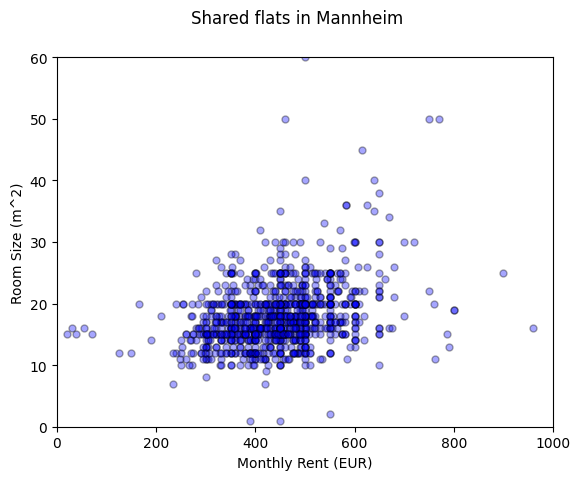

PearsonRResult(statistic=0.3139115941383178, pvalue=2.628686949538157e-24)

In [145]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
#ax.grid()
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0, 1000)
plt.ylim(0,60)
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Room Size (m^2)')
plt.scatter(rentPrice, roomSize, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, roomSize)


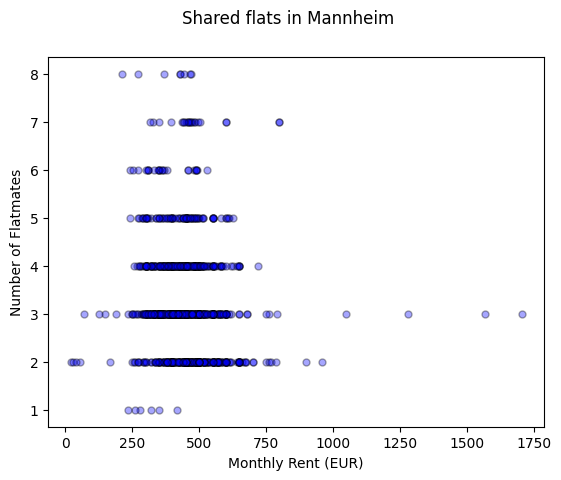

PearsonRResult(statistic=-0.09759446552312126, pvalue=0.002003410045642673)

In [109]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Number of Flatmates')
plt.scatter(rentPrice, flatmates, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, flatmates)

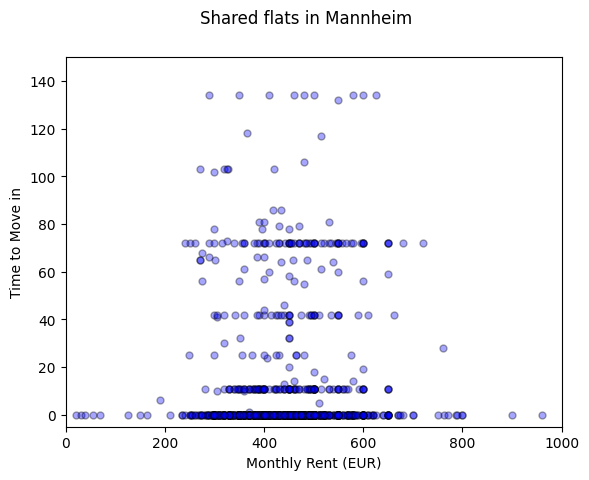

PearsonRResult(statistic=-0.09759446552312126, pvalue=0.002003410045642673)

In [137]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.xlabel('Monthly Rent (EUR)')
plt.ylabel('Time to Move in')
plt.xlim(0, 1000)
plt.ylim(-5, 150)
plt.scatter(rentPrice, timeToMoveIn, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, flatmates)

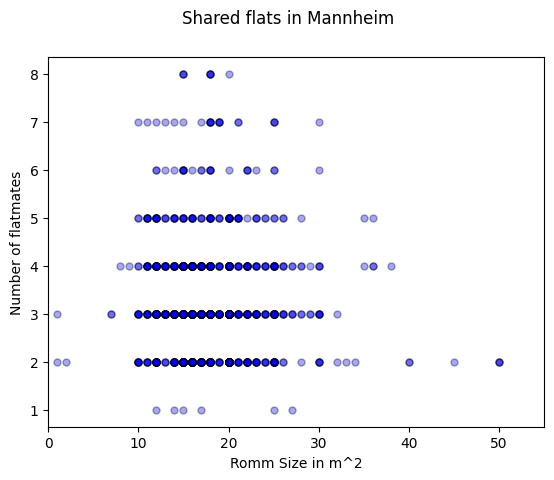

PearsonRResult(statistic=-0.03071029635442749, pvalue=0.33196722494212055)

In [141]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.ylabel('Number of flatmates')
plt.xlabel('Romm Size in m^2')
#plt.yscale('log')
plt.xlim(0, 55)

plt.scatter(roomSize, flatmates, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(roomSize, flatmates)

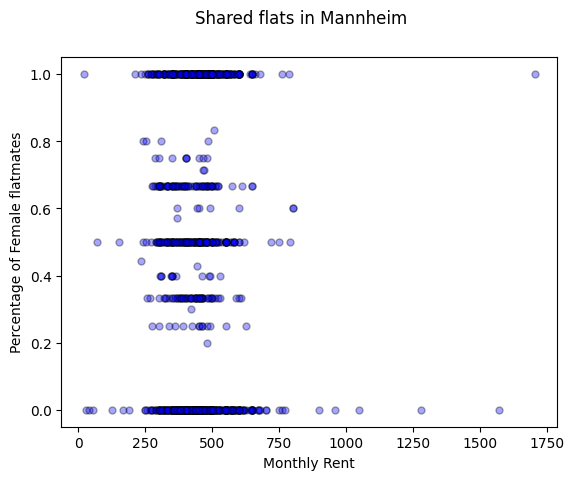

PearsonRResult(statistic=-0.039223746164795265, pvalue=0.2152383681505074)

In [115]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.ylabel('Percentage of Female flatmates')
plt.xlabel('Monthly Rent')
#plt.xscale('log')
#plt.yscale('log')

plt.scatter(rentPrice, femalePercentage, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, femalePercentage)

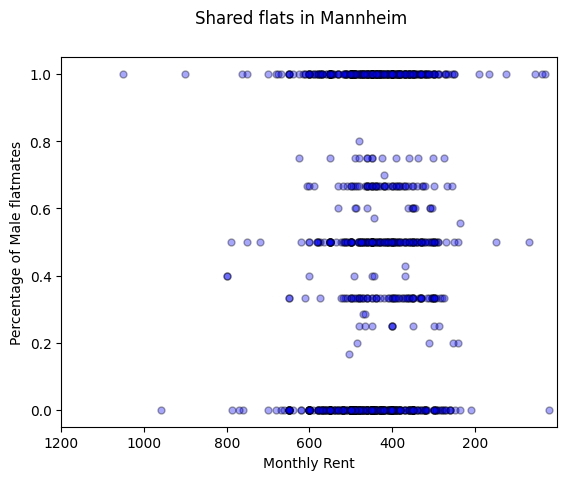

PearsonRResult(statistic=-0.08584731751739545, pvalue=0.00660058761448674)

In [117]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.suptitle("Shared flats in Mannheim")
plt.ylabel('Percentage of Male flatmates')
plt.xlabel('Monthly Rent')
plt.xlim(1200)
#plt.xscale('log')
#plt.yscale('log')

plt.scatter(rentPrice, malePercentage, s=25, c='blue',edgecolors='black', linewidths=1, alpha=0.35)
plt.show()

scipy.stats.pearsonr(rentPrice, malePercentage)